# Determining important factors for popular movies post 2010

## Introduction

In this notebook we will explore some of the characteristics of the most successful movies from the last 10 years. This analysis was done using data from the tmdb movies database (tmdb.movies.csv) and The Numbers (tn.movie_budgets.csv) database. We will start with a look at the original data and then discuss the process for cleaning and merging these two databases into a single dataframe. From this final datatframe we generate several plots and tables that will help us draw conclusions about important characteristics for successful movies.

## Importing Modules

numpy, matplotlib, seaborn, and pandas serve as the basis for our analysis. The data_cleaner module that we important here was written to compactify all of the cleaning that we do on the dataframes. We'll also set some rcParams here to make our plots a little prettier.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from data_cleaner import clean_movie_budgets
from data_cleaner import clean_tmdb_movies
from data_cleaner import join_dataframes

from movie_data_plotter import plot_genre_counts
from movie_data_plotter import plot_avg_genre_stats

%matplotlib inline
%load_ext autoreload
%autoreload 2

pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 12

## Importing the data

In [4]:
tmdb_movies_df = pd.read_csv('data/tmdb.movies.csv')
tn_budgets_df = pd.read_csv('data/tn.movie_budgets.csv')

## A first look at the raw data

Let's take a look at the heads of these two dataframes to see what we're working with. We'll also call .info() to get a quick look at any of the information that might be missing.

In [5]:
tmdb_movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [6]:
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
Unnamed: 0           26517 non-null int64
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [7]:
tn_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [8]:
tn_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


---
## Methodology

Right away we see that there aren't any null values in the tmdb database, which is a nice thing to see. We can definitely get rid of the unnamed column as it just seems to be an extra index. The genre ids will need to be associated with an actual genre name, but it shouldn't be too difficult to find that information. Since the id column in this dataframe doesn't match with the one in the numbers dataframe, we can drop it as well. We don't really know much about the foregin film industry, so it seems that the original language column will be useful in filtering out movies not produced in America. We'll drop the original titles as well because those might make things confusing. It's also nice to see the release date listed here as that will make it easy to filter out anything that was released before 2010. Lastly, we'll be keeping the popularity, vote_average (rating), and vote_count columns as those will be important for determing what makes recent movies so successful.

The info method also tells us that there aren't any nulls in the numbers dataframe. Another win! We'll drop the id column here and also filter by release date just like in the tmdb database. The production budget, domestic gross, and worldwide gross are definitely going to be important for determining our measures for success, so we'll need to keep those.

With all of this in mind, the most obvious way to merge these two dataframes after cleaning is to use the title columns. We'll perform the cleaning and joining using our modules in the cell below.

In [9]:
clean_tmdb_movies_df = clean_tmdb_movies(tmdb_movies_df)
clean_tn_budgets_df = clean_movie_budgets(tn_budgets_df)
joined_movies_df = join_dataframes(clean_tmdb_movies_df, clean_tn_budgets_df)

/Users/garrett/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


During the cleaning and joining we've done a few things in addition to dropping columns. First, we've removed any of the production budgets, domestic grosses, and worldwide grosses with values listed as 0, as these won't be interesting in our analysis. We've also converted the values in these columns to millions of dollars so that they're easier to read. Lastly, we've created some new columns in order to determine ratios between profit and production budget on the domestic and worldwide scales. There is also a column called worldwide_domestic_ratio, which determines how much more money a movie will make when it's released worldwide. Here are the results:

In [10]:
joined_movies_df.head()

,genres,popularity,vote_average,vote_count,production_budget ($M),domestic_gross ($M),worldwide_gross ($M),domestic_production_ratio,worldwide_production_ratio,worldwide_domestic_ratio
title,,,,,,,,,,
10 Cloverfield Lane,"[thriller, sci-fi, drama]",17.892,6.9,4629,5.0,72.1,108.3,14.42,21.66,1.50
12 Strong,"[war, drama, history, action]",13.183,5.6,1312,35.0,45.8,71.1,1.31,2.03,1.55
12 Years a Slave,"[drama, history]",16.493,7.9,6631,20.0,56.7,181.0,2.84,9.05,3.19
127 Hours,"[adventure, drama, thriller]",11.435,7.0,4469,18.0,18.3,60.2,1.02,3.34,3.29
13 Hours: The Secret Soldiers of Benghazi,"[action, drama, history, thriller, war]",21.486,7.0,1573,50.0,52.9,69.4,1.06,1.39,1.31


In [11]:
joined_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 10 Cloverfield Lane to Zootopia
Data columns (total 10 columns):
genres                        683 non-null object
popularity                    683 non-null float64
vote_average                  683 non-null float64
vote_count                    683 non-null int64
production_budget ($M)        683 non-null float64
domestic_gross ($M)           683 non-null float64
worldwide_gross ($M)          683 non-null float64
domestic_production_ratio     683 non-null float64
worldwide_production_ratio    683 non-null float64
worldwide_domestic_ratio      683 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 58.7+ KB


---
After all of the cleaning we're still left 683 entries. As a final step we'll make a significant cut on this list by constraining our analysis to the top 101 most popular movies in our joined dataframe. From the tmdb database [documentation](https://developers.themoviedb.org/3/getting-started/popularity), we know that popularity is based on number of votes, number of views, number of favorites, how recently a movie was released, etc. This recency bias in the popularity metric is especially beneficial to our analysis as we are trying to look at what the market currently demands.

In [12]:
top_101_movies_df = joined_movies_df.sort_values(by = 'popularity', ascending = False).iloc[:101]

## Analysis

As a first step in our analysis we want to know which genres are appearing the most in the top 101 movies. A group of investors looking to start a studio and get into the business will want to know which kinds of movies they should focus on so that they have the best chance of becoming popular.

[('music', 2), ('history', 4), ('war', 5), ('horror', 7), ('mystery', 11), ('crime', 11), ('animated', 14), ('family', 18), ('comedy', 23), ('thriller', 25), ('fantasy', 26), ('sci-fi', 35), ('drama', 37), ('adventure', 46), ('action', 55)]


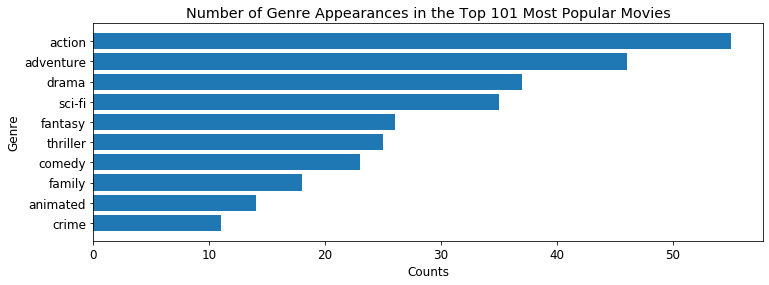

In [13]:
plot_genre_counts(top_101_movies_df)

Here we see that action and adventure are by far the most common of the top 101 most popular movies. Drama and sci-fi also happen to be pretty frequent, along with fantasies and thrillers. We've also output the actual counts to show what doesn't appear in the top 10. Note that the number of counts does not sum to 101 as there are many movies with overlapping genres. We have not yet performed an analysis on which genres most frequently overlap, so we are making the assumption that we can treat them somewhat independently. This is a broad assumption, but this chart still allows us to see that if a movie falls under the action genre that it has a better chance of appearing among the most popular.

Now that we've seen what shows up most often, we will also look at which movies among the top 101 most popular have the highest average popularity rating. While we see that action and adventure movies are overwhelmingly common, it's also important that they consistently perform well.

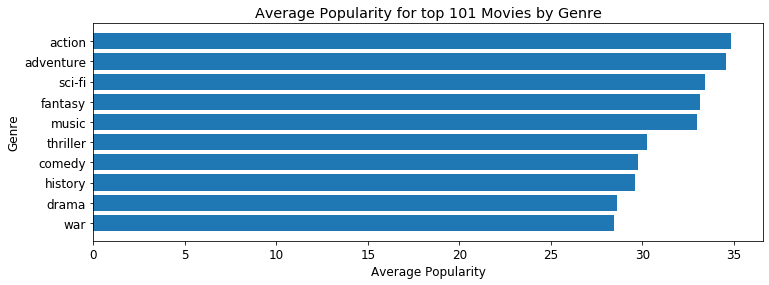

In [14]:
plot_avg_genre_stats(top_101_movies_df, 'popularity')

Interestingly, but perhaps not surprisingly, action and adventure movies have the highest average popularity. Also interesting to note is that sci-fi and fantasy genres come in second and third on this chart, while they are fourth and fifth on the chart for number of appearances. Drama, which is third for number of appearances, makes a significant drop down to the ninth place in terms of popularity. Note also that music appears in the fifth spot here. However, it only appears in the top 101 movies 2 times, so this statistic is not necessarily significant. If we were to make a recommendation to a potential studio, we would say that action and adventure should be the primary genres to focus on as they both appear in the top 101 movies often while also being rated the highest on average.

---

The next question we will address is whether or not it is beneficial to release movies on an international versus domestic scale. This will be filtered by rating in order to see if there is a correlation between worldwide versus domestic profit for movies with higher ratings. We will use our worldwide to domestic gross ratio as a metric to determine this.

In [17]:
profit_ratio_df = top_101_movies_df.groupby(pd.cut(top_101_movies_df['vote_average'],
                                                    bins=np.arange(5.5, 9, step=.8),
                           include_lowest=False))['worldwide_domestic_ratio'].agg(['count','mean'])

profit_ratio_df.rename(columns = {'mean': 'worldwide/domestic profit'}, inplace = True)
profit_ratio_df

,count,worldwide/domestic profit
vote_average,,
"(5.5, 6.3]",8,2.688750
"(6.3, 7.1]",31,2.511290
"(7.1, 7.9]",48,2.460625
"(7.9, 8.7]",14,2.972143


Regardless of the average rating, it seems to be beneficial to release movies on a worldwide scale if you can ensure that your movie is going to be among the top 101 most popular. If you can ensure an average rating above 7.9, you can increase the profit ratio from around approximately 2.5 to 3.

Next, we will address the gross profit itself on a worldwide scale based on ratings. A natural assumption to make would be that higher rated movies will also gross higher, so let's try to confirm that.

In [18]:
vote_avg_df = top_101_movies_df.groupby(pd.cut(top_101_movies_df['vote_average'],
                                                    bins=np.arange(5.5, 9, step=.8),
                           include_lowest=False))['worldwide_gross ($M)'].agg(['count','mean'])

vote_avg_df.rename(columns = {'mean': 'Average Worldwide Gross ($M)'}, inplace = True)
vote_avg_df

,count,Average Worldwide Gross ($M)
vote_average,,
"(5.5, 6.3]",8,408.112500
"(6.3, 7.1]",31,505.580645
"(7.1, 7.9]",48,608.643750
"(7.9, 8.7]",14,626.492857


This is pretty much in line with our expectations. Additionally, a studio would want to consider that being able to report high ratings in conjunction with high grossing films on the international scale will boost their public image.

For the final parts of our analysis we will explore the relationships between production budget and worldwide gross, as well as production budget and the worldwide to production budget ratio. The classic is that you have to spend money to make money. We expect that spending more money on production will lead to higher worldwide profits (and as seen above, higher ratings). But we also want to know if spending more money means that your profit to production ratio is going to increase

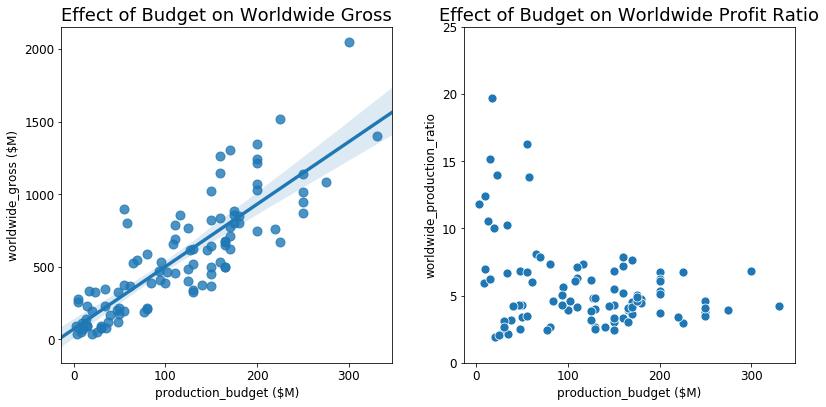

In [19]:
fig, (axs1, axs2) = plt.subplots(1,2, figsize = (12,6))

sns.set_context("talk")
sns.regplot(top_101_movies_df['production_budget ($M)'],
                top_101_movies_df['worldwide_gross ($M)'], ax = axs1). \
                set_title('Effect of Budget on Worldwide Gross')
sns.scatterplot(top_101_movies_df['production_budget ($M)'],
                top_101_movies_df['worldwide_production_ratio'], ax = axs2). \
                set_title('Effect of Budget on Worldwide Profit Ratio')

axs2.set_ylim(0,25)

plt.tight_layout()

From the regplot on the left it certainly looks like the classic saying is true. Spending more money on your movies is good if you want them to gross highly on a worldwide scale. Interestingly, though, a higher production budget doesn't necessarily mean that the movie is going to have an enormous profit ratio. For production budgets around or below 50 million dollars, there are sometimes profit ratios up to 25x! After this threshold it appears that there is a very slight increase in the profit ratio, but it's nothing to really write home about. Since there's not much data for these movies with enormous returns, it would be unrealistic to expect big returns if the focus is in this area. Pursuing this route may also give the studio a reputation of being cheap.

## Conclusions

All of this work cleaning our data and performing our basic analysis has led to some interesting conclusions that we'll summarize here.

1.) Action and adventure movies are appear the most frequently in the top 101 most popular movies. They also have the highest average popularity.

2.) If a movie is in the top 101 in popularity rankings, it can make between 2.5 to 3 times more money if it's released on an international scale.

3.) Movies with higher average ratings tend to generate more revenue on a worldwide scale. 

4.) Having a low production budget can sometimes lead to enormous profit ratios, but this isn't guarenteed. Focusing on good, quality movies that also have good ratings is important.